In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
import  joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

from sklearn.decomposition import PCA

Fonte: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### PCA Principal Component Analysis
* Variância e covariância são uma medida do “espalhamento” de um conjunto de pontos ao redor do centro de massa (média)
* Variância - medida do desvio da média para pontos em uma dimensão, por exemplo alturas
* Covariância como uma medida de quanto cada uma das dimensões variam da média em relação um ao outro.
* A covariância é medida entre 2 dimensões para verificar se existe uma relação entre as 2 dimensões. 
    * Ex:  número de horas estudado e notas obtidas.
* A covariância entre uma dimensão e ela mesma é a variancia


### Matriz de covariância
* É uma matriz quadrada de tamanho igual a quantidade de linhas
* A diagonal principal mostra a variância


### Interpretando covariância

* Um valor positivo de covariância indica ambos dimensões aumentam ou diminuem juntas. 

* Um valor negativo indica enquanto um aumenta a outras diminuições ou vice-versa 

* Se a covariância for zero: as duas dimensões são independentes um do outro

* Cálculos de covariância são usados para encontrar relações em conjuntos de dados com muitas  dimensões (geralmente maiores que 3) onde a visualização é difícil

### O exemplo de dados abaixo mostra um dataset com três colunas
* As linhas são uma função da primeira linhas multiplicada por um escalar
* A Seguir a matriz de coraviancia

In [26]:
x = np.array([[1, 2,3], [2, 4,6], [4, 8, 12], [3, 6, 9], [3, 6, 9], [5, 10, 15], [6, 12, 18]])
np.cov(x) # covariação

array([[ 1.,  2.,  4.,  3.,  3.,  5.,  6.],
       [ 2.,  4.,  8.,  6.,  6., 10., 12.],
       [ 4.,  8., 16., 12., 12., 20., 24.],
       [ 3.,  6., 12.,  9.,  9., 15., 18.],
       [ 3.,  6., 12.,  9.,  9., 15., 18.],
       [ 5., 10., 20., 15., 15., 25., 30.],
       [ 6., 12., 24., 18., 18., 30., 36.]])

### A figura abaixo mostra uma linha com os pontos determinados pelas 3 dimensões

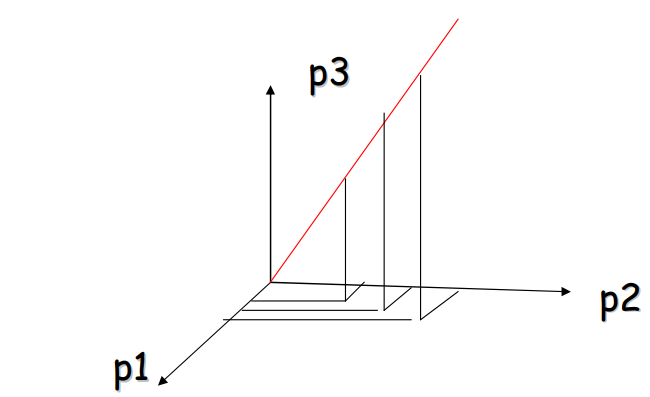

* Considere um novo sistema de coordenadas em que um dos eixos está na direção dessa linha
* Um dos eixos pode entao ser usado para definir os outros dois

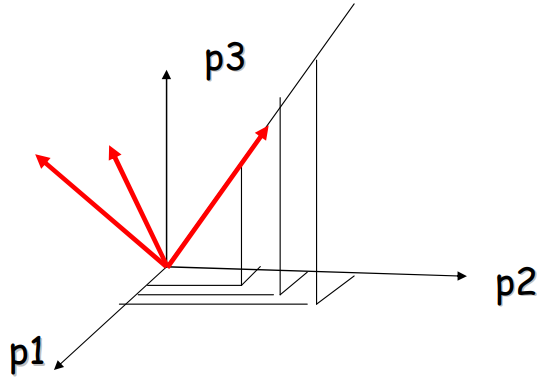

* Análise de componentes principais (PCA) é uma técnica usada para simplificar um conjunto de dados
* É uma transformação linear que escolhe uma nova sistema de coordenadas para o conjunto de dados maior variação por qualquer projeção dos dados 
* O conjunto com maior variancia fica no primeiro eixo (então chamado de primeiro componente principal),
    * A segunda maior variância no segundo eixo, e assim por diante.
* O PCA pode ser usado para reduzir a dimensionalidade, eliminando os componentes principais posteriores.

#### Considere o conjunto de pontos a seguir
* 200 pontos aleatórios em duas dimensões

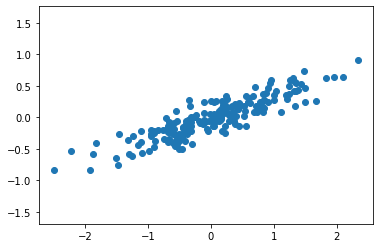

In [27]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

* Há uma relação  linear entre as variáveis x e y. 


* O problema de aprendizado não supervisionado tenta aprender sobre a relação entre os valores x e y. 
    * Contrapondo a tentar prever os valores de y a partir dos valores de x

* Na análise de componentes principais (PCA), esse relacionamento é quantificado encontrando uma lista dos eixos principais nos dados e usando esses eixos para descrever o conjunto de dados. 

* Usando o estimador PCA do Scikit-Learn:

In [28]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [30]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


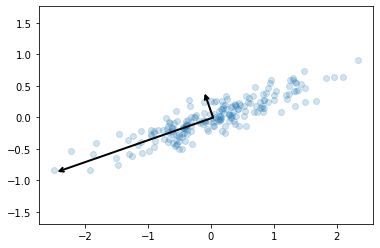

In [31]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');



Esses vetores representam os principais eixos dos dados, e o comprimento do vetor é uma indicação de quão "importante" esse eixo é na descrição da distribuição dos dados 
* Mais precisamente, é uma medida da variação dos dados quando projetados. 
* Nesse eixo. A projeção de cada ponto de dados nos eixos principais são os "componentes principais" dos dados.

* O uso do PCA para redução de dimensionalidade envolve zerar um ou mais dos menores componentes principais
 * Resultando em uma projeção em dimensão mais baixa dos dados que preserva a variação máxima dos dados.
* Abaixo é mostrado o uso do PCA

In [32]:
#pca = PCA(n_components=1)
pca = PCA(0.1)

pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


* Os dados transformados foram reduzidos para uma única dimensão. 
* Podemos realizar a transformação inversa desses dados reduzidos
* Gráfico comparando dados transformados com dados reduzidos

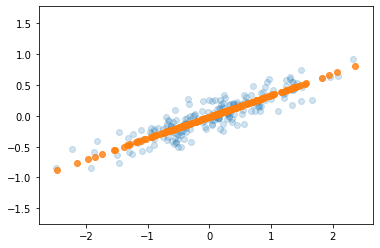

In [35]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
print(pca.explained_variance_)

Este conjunto de dados de dimensão reduzida é, em alguns sentidos, "bom o suficiente" para codificar os relacionamentos mais importantes entre os pontos: apesar de reduzir a dimensão dos dados em 50%, o relacionamento geral entre os pontos de dados é principalmente preservado.

### Teste de PCA com base mnist

In [47]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [54]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show() 

(1797, 64)
(1797, 2)


In [ ]:
pca = PCA(50)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

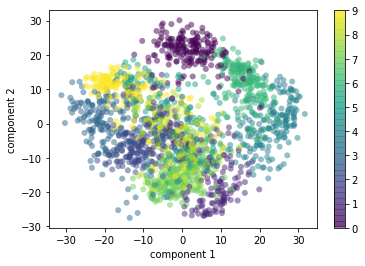

In [55]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Escolhendo número de dimensões para PCA

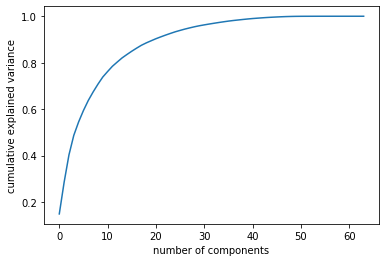

In [56]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

### Gerando ruído aleatódio nos dados

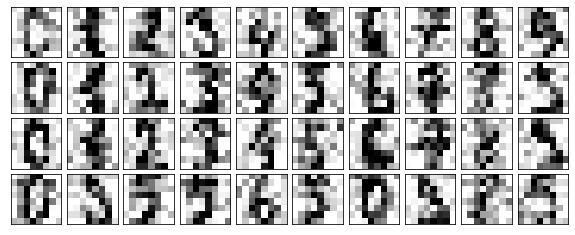

In [58]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)


def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))




plot_digits(noisy)

### TRansformando com PCA mantendo 50% da variância
* Foi gerado 12 componentes nesse caso

In [59]:
pca = PCA(0.50).fit(noisy)
pca.n_components_


12

### Transformação inversa reduziu ruídos

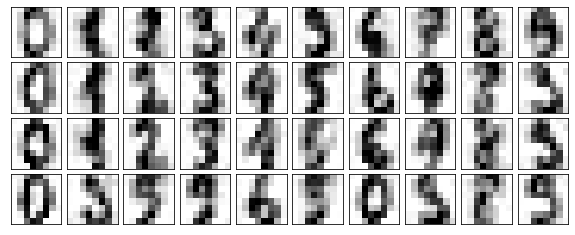

In [60]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)


### Testes usando PCA para reduzir dimensionalidade

In [45]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.target.shape)
print(data.data.shape)
X=data.data
y=data.target


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

sgd_clf = KNeighborsClassifier(n_neighbors=3)

sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

(569,)
(569, 30)
[[14  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.98      0.95      0.96        42

    accuracy                           0.95        57
   macro avg       0.93      0.94      0.93        57
weighted avg       0.95      0.95      0.95        57



(569, 2)
[[21  2]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.94      0.97      0.96        34

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



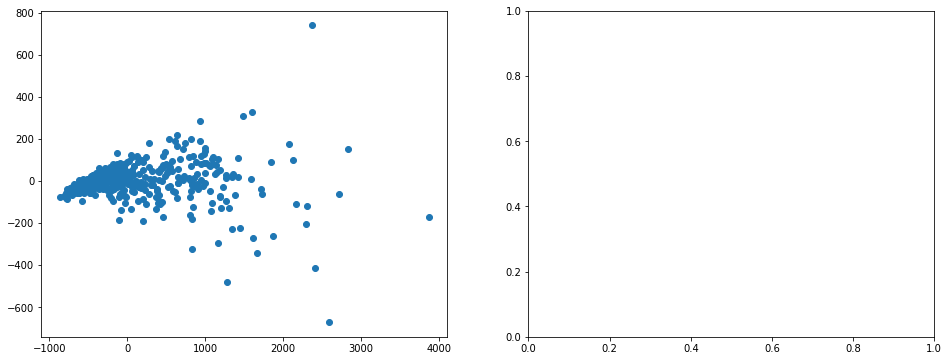

In [44]:
pca = PCA(2)
pca.fit(X)
XPCA = pca.transform(X)

print(XPCA.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(XPCA[:,0], XPCA[:,1])

y=data.target

X_train, X_test, y_train, y_test = train_test_split(XPCA,y, test_size=0.1)

sgd_clf = KNeighborsClassifier(n_neighbors=3)

sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))